In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from pandas_profiling import ProfileReport
from IPython.display import set_matplotlib_formats

warnings.filterwarnings('ignore')
set_matplotlib_formats('svg')
sns.set_style('whitegrid')

In [2]:
def plot(x, y=None, title=None, x_label=None, y_label=None, kind='plot', **kwargs):
    f, n = {
        'plot': (plt.plot, 2),
        'line': (plt.plot, 2),
        'scatter': (plt.scatter, 2),
        'hist': (plt.hist, 1),
        'dist': (sns.distplot, 1),
        'box': (sns.boxplot, 1),
        'violin': (sns.violinplot, 1),
        'reg': (sns.regplot, 2),
        'lm': (sns.lmplot, 2),
    }[kind]
    f(x, **kwargs) if n == 1 else f(x, y, **kwargs)
    ax = kwargs['ax'] if 'ax' in kwargs else plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    return ax

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - `1000(Bk - 0.63)^2` where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

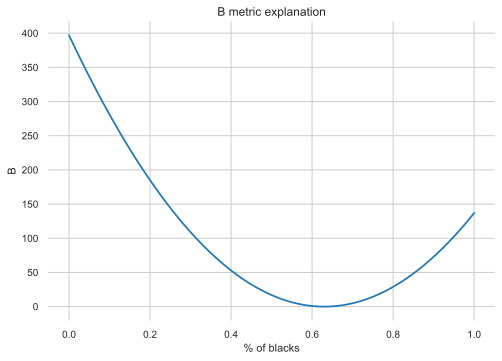

In [3]:
x = np.linspace(0, 1, 100)
y = 1000*np.power(x - 0.63, 2)

plot(x, y, title='B metric explanation', x_label='% of blacks', y_label='B')

In [4]:
column_names = [
    'crime_rate',
    'pr_residential_zones',
    'pr_non_retail_business',
    'is_tract_bounds_river',
    'air_pollution',
    'avg_no_rooms',
    'pr_old_buildings',
    'dist_to_centre',
    'idx_acc_to_highways',
    'tax_amount',
    'pupil_teacher_ratio',
    'pr_black',
    'pt_poverty',
    'median_owner_occupied',
]

df = pd.read_csv('housing.csv', header=None, delimiter=r'\s+', names=column_names)

In [5]:
df.head(1)

,crime_rate,pr_residential_zones,pr_non_retail_business,is_tract_bounds_river,air_pollution,avg_no_rooms,pr_old_buildings,dist_to_centre,idx_acc_to_highways,tax_amount,pupil_teacher_ratio,pr_black,pt_poverty,median_owner_occupied
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


In [6]:
df.head(20)

,crime_rate,pr_residential_zones,pr_non_retail_business,is_tract_bounds_river,air_pollution,avg_no_rooms,pr_old_buildings,dist_to_centre,idx_acc_to_highways,tax_amount,pupil_teacher_ratio,pr_black,pt_poverty,median_owner_occupied
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
df.shape

(506, 14)

In [8]:
from pandas_profiling import ProfileReport

In [10]:
df = df[df['median_owner_occupied'] < 50.0].reset_index(drop=True)

---

# Валидация

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
def fixed_train_test_split(df, test_size=0.15, random_state=1234):    
    df_train, df_valid = train_test_split(df, test_size=test_size, random_state=random_state)
    X_train, y_train = df_train.drop('median_owner_occupied', axis=1), df_train['median_owner_occupied']
    X_valid, y_valid = df_valid.drop('median_owner_occupied', axis=1), df_valid['median_owner_occupied']
    return X_train, y_train, X_valid, y_valid

---

# Бейзлайн + трекинг

In [13]:
import mlflow

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
def calc_metrics(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return rmse, mae, r2

def log_metrics(rmse_train, 
                mae_train, 
                r2_train, 
                rmse_valid, 
                mae_valid, 
                r2_valid):
    mlflow.log_metric('rmse_train', rmse_train)
    mlflow.log_metric('mae_train', mae_train)
    mlflow.log_metric('r2_train', r2_train)
    
    mlflow.log_metric('rmse_valid', rmse_valid)
    mlflow.log_metric('mae_valid', mae_valid)
    mlflow.log_metric('r2_valid', r2_valid)

In [15]:
def log_parameters(model, only_model_name=True, **params):
    name = model.__class__.__name__
    if only_model_name:
        mlflow.log_param('model_name', name)
    else:
        mlflow.sklearn.log_model(model, name)
    mlflow.log_params(params)

In [17]:
mlflow.set_experiment('Boston')

In [19]:
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df)

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

with mlflow.start_run(run_name='Baseline'):
    log_metrics(rt, mt, r2t, r, m, r2)
    log_parameters(clf)

---

# Сравнение моделей

In [20]:
from sklearn.svm import SVR

In [21]:
from tqdm.auto import tqdm

In [22]:
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df)

epses = [1e-1, 1e0, 1e1, 1e2, 1e3]
Cs = [1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2]

pbar = tqdm(total=len(epses)*len(Cs))

for eps in epses:
    for C in Cs:
        clf = SVR(epsilon=eps, C=C)
        clf.fit(X_train, y_train)
        y_pred_t = clf.predict(X_train)
        y_pred = clf.predict(X_valid)

        rt, mt, r2t = calc_metrics(y_train, y_pred_t)
        r, m, r2 = calc_metrics(y_valid, y_pred)

        with mlflow.start_run(run_name='SVR'):
            log_metrics(rt, mt, r2t, r, m, r2)
            log_parameters(clf, C=C, eps=eps)

        pbar.update(1)
pbar.close()

---

# Выделим отдельную функцию прежде чем продолжим

In [23]:
import itertools

In [25]:
# itertools.product созадет все пары между двумя списками
list(itertools. product([1,2,3], [4,5,6]))

[(1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6)]

In [26]:
import itertools
from collections import OrderedDict


def make_tester(X_train, y_train, X_valid, y_valid):
    
    def test_regressor(model_name, model_class, parameters, verbose=True):

        parameters = OrderedDict({k: parameters[k] for k in sorted(parameters.keys())})

        keys = list(parameters.keys())
        nplets = list(itertools.product(*list(parameters.values())))

        if verbose:
            nplets = tqdm(nplets)

        for t in nplets:
            d = dict(zip(keys, t))
            
            clf = model_class(**d)
            clf.fit(X_train, y_train)
            y_pred_t = clf.predict(X_train)
            y_pred = clf.predict(X_valid)

            rt, mt, r2t = calc_metrics(y_train, y_pred_t)
            r, m, r2 = calc_metrics(y_valid, y_pred)

            with mlflow.start_run(run_name=model_name):
                log_metrics(rt, mt, r2t, r, m, r2)
                log_parameters(clf, **d)

    return test_regressor

In [27]:
test_regressor = make_tester(X_train, y_train, X_valid, y_valid)

In [28]:
from sklearn.linear_model import ElasticNet

In [29]:
test_regressor('ElasticNet', ElasticNet, {
    'alpha': [0.001, 0.01],
    'l1_ratio': [0.6, 0.7, 0.8, 0.9],
})

# Деревянные модели и бустинг

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
test_regressor('RandomForest_NumTreesSearch', RandomForestRegressor, {
    'max_depth': [3],
    'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300, 1000]
})

In [33]:
test_regressor('RandomForest_DepthSearch', RandomForestRegressor, {
    'max_depth': [3,5,7,10,15,20,30,50,100,None],
    'n_estimators': [100]
})

In [34]:
test_regressor('RandomForest_DepthSearch', RandomForestRegressor, {
    'max_depth': [20],
    'n_estimators': [100],
})

---

# Новые признаки и подготовка признаков

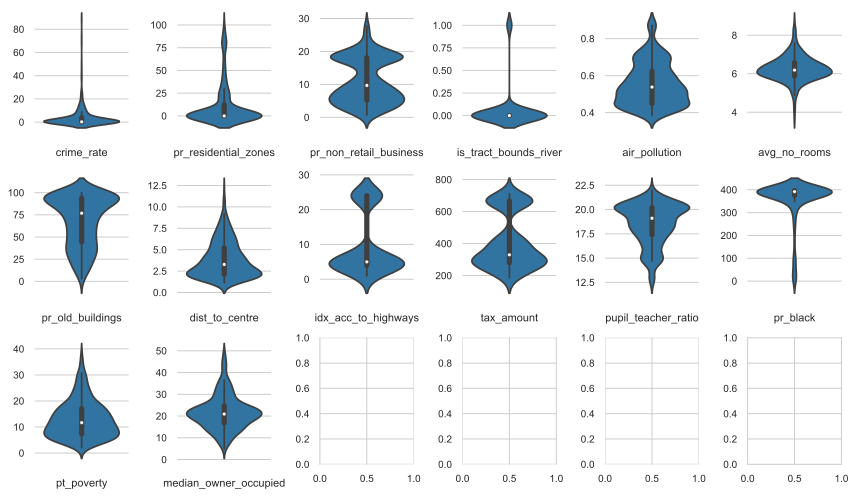

In [35]:
f, axs = plt.subplots(3, 6, figsize=(12, 7))
axs = axs.flatten()
for i, c in enumerate(df.columns):
    plot(df[c], x_label=c, kind='violin', ax=axs[i], orient='v')
plt.tight_layout()    

In [36]:
def split_bimodal_feature(df, col_name, x, postfixes=('lt', 'gt'), remove_original=True):
    lt_col_name = '_'.join([col_name, postfixes[0]])
    gt_col_name = '_'.join([col_name, postfixes[1]])
    
    df[lt_col_name] = 0
    df[gt_col_name] = 0
    m = df[col_name] < x
    df.loc[m, lt_col_name] = df.loc[m, col_name]
    df.loc[~m, gt_col_name] = df.loc[~m, col_name]
    
    if remove_original:
        df.drop(col_name, axis=1, inplace=True)

In [37]:
split_bimodal_feature(df, 'pr_non_retail_business', 14.5, remove_original=False)
split_bimodal_feature(df, 'tax_amount', 550, remove_original=False)
split_bimodal_feature(df, 'idx_acc_to_highways', 15, remove_original=False)

In [39]:
rest_of_cols = [x for x in df.columns if ('pr_non_retail_business' not in x)
                                         and ('tax_amount' not in x)
                                         and ('idx_acc_to_highways' not in x)
]

In [40]:
df_orig = df[['pr_non_retail_business', 
              'tax_amount', 
              'idx_acc_to_highways'] + rest_of_cols]

df_mod = df[['pr_non_retail_business_lt', 'pr_non_retail_business_gt',
             'tax_amount_lt', 'tax_amount_gt',
             'idx_acc_to_highways_lt', 'idx_acc_to_highways_gt'] + rest_of_cols]

In [41]:
df_orig.shape, df_mod.shape

((490, 14), (490, 17))

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [43]:
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df_orig)

clf = Pipeline([
    ('scale', MinMaxScaler()),
    ('clf', LinearRegression()),
])
clf.fit(X_train, y_train)

y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 3.6725  MAE: 2.7254  R2: 0.7821
On VALID: RMSE: 3.9660  MAE: 2.8602  R2: 0.7404


In [44]:
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df_mod)

clf = Pipeline([
    ('scale', MinMaxScaler()),
    ('clf', LinearRegression()),
    
])
clf.fit(X_train, y_train)

y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 3.6246  MAE: 2.6919  R2: 0.7878
On VALID: RMSE: 3.8254  MAE: 2.6788  R2: 0.7585


---

In [45]:
for c in df.columns:
    print(f'Распределение {c.ljust(25)} имеет тяжелый правый хвост' 
          if df[c].skew() > 0.3 else 
          f'Распределение {c.ljust(25)} имеет тяжелый левый или симметрично')

Распределение crime_rate                имеет тяжелый правый хвост
Распределение pr_residential_zones      имеет тяжелый правый хвост
Распределение pr_non_retail_business    имеет тяжелый правый хвост
Распределение is_tract_bounds_river     имеет тяжелый правый хвост
Распределение air_pollution             имеет тяжелый правый хвост
Распределение avg_no_rooms              имеет тяжелый левый или симметрично
Распределение pr_old_buildings          имеет тяжелый левый или симметрично
Распределение dist_to_centre            имеет тяжелый правый хвост
Распределение idx_acc_to_highways       имеет тяжелый правый хвост
Распределение tax_amount                имеет тяжелый правый хвост
Распределение pupil_teacher_ratio       имеет тяжелый левый или симметрично
Распределение pr_black                  имеет тяжелый левый или симметрично
Распределение pt_poverty                имеет тяжелый правый хвост
Распределение median_owner_occupied     имеет тяжелый правый хвост
Распределение pr_non_retai

In [46]:
def log1p_columns(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = np.log1p(df[c])
    return df

def expm1_columns(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = np.expm1(df[c])
    return df

In [47]:
from functools import partial

In [48]:
cols_to_log = ['crime_rate',
                'pr_residential_zones',
                'pr_non_retail_business',
                'is_tract_bounds_river',
                'air_pollution',
                'dist_to_centre',
                'idx_acc_to_highways',
                'tax_amount',
                'pt_poverty',
                'pr_non_retail_business_lt',
                'pr_non_retail_business_gt',
                'tax_amount_gt',
                'idx_acc_to_highways_gt']

log1p_boston = partial(log1p_columns, cols=cols_to_log)
expm1_boston = partial(expm1_columns, cols=cols_to_log)

In [49]:
df_orig = log1p_boston(df_orig)
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df_orig)

clf = Pipeline([
    ('scale', MinMaxScaler()),
    ('clf', LinearRegression()),
])
clf.fit(X_train, y_train)

y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

df_orig = expm1_boston(df_orig)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 3.3876  MAE: 2.5671  R2: 0.8146
On VALID: RMSE: 3.7026  MAE: 2.7953  R2: 0.7737


In [50]:
df_mod = log1p_boston(df_mod)
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df_mod)

clf = Pipeline([
    ('scale', MinMaxScaler()),
    ('clf', LinearRegression()),
    
])
clf.fit(X_train, y_train)

y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

df_mod = expm1_boston(df_mod)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 3.3702  MAE: 2.5633  R2: 0.8165
On VALID: RMSE: 3.7474  MAE: 2.7373  R2: 0.7682


---

# Выбор признаков

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [53]:
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df_mod)

In [54]:
clf = RandomForestRegressor(n_estimators=10, max_depth=10)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [55]:
y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 1.3137  MAE: 0.9245  R2: 0.9721
On VALID: RMSE: 2.8127  MAE: 1.9351  R2: 0.8694


In [59]:
model = SelectFromModel(clf, prefit=True)

In [60]:
X_train.shape

(416, 16)

In [61]:
X_new_train = model.transform(X_train)
X_new_valid = model.transform(X_valid)

In [64]:
X_new_train.shape, X_new_valid.shape

((416, 2), (74, 2))

In [63]:
clf.fit(X_new_train, y_train)

y_pred_t = clf.predict(X_new_train)
y_pred = clf.predict(X_new_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 1.8359  MAE: 1.3043  R2: 0.9455
On VALID: RMSE: 3.2827  MAE: 2.3284  R2: 0.8221


In [65]:
clf = RandomForestRegressor(n_estimators=10, max_depth=10)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [66]:
X_train.columns

Index(['pr_non_retail_business_lt', 'pr_non_retail_business_gt',
       'tax_amount_lt', 'tax_amount_gt', 'idx_acc_to_highways_lt',
       'idx_acc_to_highways_gt', 'crime_rate', 'pr_residential_zones',
       'is_tract_bounds_river', 'air_pollution', 'avg_no_rooms',
       'pr_old_buildings', 'dist_to_centre', 'pupil_teacher_ratio', 'pr_black',
       'pt_poverty'],
      dtype='object')

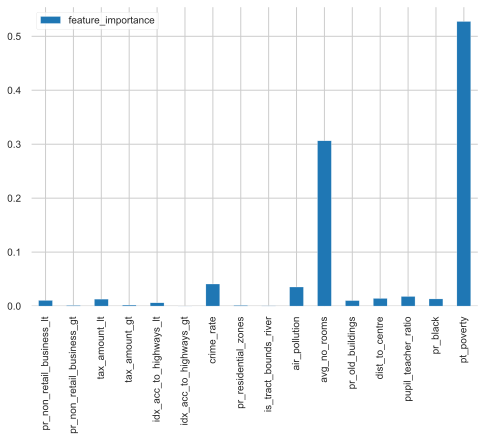

In [67]:
pd.DataFrame(data={'feature_importance': clf.feature_importances_}, index=X_train.columns).plot.bar()

In [68]:
df_test = df_mod[['pt_poverty', 'avg_no_rooms', 'crime_rate', 'air_pollution', 'median_owner_occupied']]
X_train, y_train, X_valid, y_valid = fixed_train_test_split(df_test)

In [69]:
clf = RandomForestRegressor(n_estimators=10, max_depth=10)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [71]:
clf.fit(X_train, y_train)

y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 1.5502  MAE: 1.0622  R2: 0.9612
On VALID: RMSE: 2.9322  MAE: 2.2291  R2: 0.8581


In [55]:
y_pred_t = clf.predict(X_train)
y_pred = clf.predict(X_valid)

rt, mt, r2t = calc_metrics(y_train, y_pred_t)
r, m, r2 = calc_metrics(y_valid, y_pred)

print(f'On TRAIN: RMSE: {rt:.4f}  MAE: {mt:.4f}  R2: {r2t:.4f}')
print(f'On VALID: RMSE: {r:.4f}  MAE: {m:.4f}  R2: {r2:.4f}')

On TRAIN: RMSE: 1.3137  MAE: 0.9245  R2: 0.9721
On VALID: RMSE: 2.8127  MAE: 1.9351  R2: 0.8694
